# **Required Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_predict,cross_val_score
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from tensorflow import keras
from keras.layers import Dense,Dropout,Input
from keras.models import Model
from keras.utils import to_categorical,plot_model

# Loading Data

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sloan-digital-sky-survey/Skyserver_SQL2_27_2018 6_51_39 PM.csv


In [3]:
data = pd.read_csv("/kaggle/input/sloan-digital-sky-survey/Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [4]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


**Understanding the columns:**
* objid = Object Identifier
* ra = J2000 Right Ascension (r-band)
* dec = J2000 Declination (r-band)
* Right ascension (abbreviated RA) is the angular distance measured eastward along the celestial equator from the Sun at the March equinox to the hour circle of the point above the earth in question. When paired with declination (abbreviated dec), these astronomical coordinates specify the direction of a point on the celestial sphere (traditionally called in English the skies or the sky) in the equatorial coordinate system.

* Source: https://en.wikipedia.org/wiki/Right_ascension

* u = better of DeV/Exp magnitude fit
* g = better of DeV/Exp magnitude fit
* r = better of DeV/Exp magnitude fit
* i = better of DeV/Exp magnitude fit
* z = better of DeV/Exp magnitude fit
* **The Thuan-Gunn astronomic magnitude system. u, g, r, i, z represent the response of the 5 bands of the telescope.**

* Further education: https://www.astro.umd.edu/~ssm/ASTR620/mags.html

* run = Run Number
* rereun = Rerun Number
* camcol = Camera column
* field = Field number
* **Run, rerun, camcol and field are features which describe a field within an image taken by the SDSS. A field is basically a part of the entire image corresponding to 2048 by 1489 pixels. A field can be identified by:**

* **run number, which identifies the specific scan,
* **the camera column, or "camcol," a number from 1 to 6, identifying the scanline within the run, and
* **the field number. The field number typically starts at 11 (after an initial rampup time), and can be as large as 800 for particularly long runs
* **An additional number, rerun, specifies how the image was processed.
* View "SpecObj"
* specobjid = Object Identifier
* class = object class (galaxy, star or quasar object)
* The class identifies an object to be either a galaxy, star or quasar. This will be the response variable which we will be trying to predict.

* redshift = Final Redshift
* plate = plate number
* mjd = MJD of observation
* fiberid = fiber ID

* **In physics, redshift happens when light or other electromagnetic radiation from an object is increased in wavelength, or shifted to the red end of the spectrum.**

* **Each spectroscopic exposure employs a large, thin, circular metal plate that positions optical fibers via holes drilled at the locations of the images in the telescope focal plane. These fibers then feed into the spectrographs. Each plate has a unique serial number, which is called plate in views such as SpecObj in the CAS.**

* **Modified Julian Date, used to indicate the date that a given piece of SDSS data (image or spectrum) was taken.**

* **The SDSS spectrograph uses optical fibers to direct the light at the focal plane from individual objects to the slithead. Each object is assigned a corresponding fiberID.

* Further information on SDSS images and their attributes:

* http://www.sdss3.org/dr9/imaging/imaging_basics.php

* http://www.sdss3.org/dr8/glossary.php


# **Looking for and correcting missing values**

In [5]:
data.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

In [6]:
enc = LabelEncoder()
data['class'] = enc.fit_transform(data['class']) # Galaxy: 0 ,QSO : 1, Star : 2
data.drop(['objid','rerun'],1,inplace=True) #dropping objid because it is basicaly id and rerun has the same value of 301 across the entire dataset

In [7]:
data

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,2,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,2,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,2,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,2,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,2,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0,0.014019,447,51877,229


# **BasicEDA**

In [8]:
data.describe()

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,175.529987,14.836148,18.619355,17.371931,16.840963,16.583579,16.422833,981.034800,3.648700,302.380100,1.645022e+18,0.915400,0.143726,1460.986400,52943.533300,353.069400
std,47.783439,25.212207,0.828656,0.945457,1.067764,1.141805,1.203188,273.305024,1.666183,162.577763,2.013998e+18,0.952856,0.388774,1788.778371,1511.150651,206.298149
min,8.235100,-5.382632,12.988970,12.799550,12.431600,11.947210,11.610410,308.000000,1.000000,11.000000,2.995780e+17,0.000000,-0.004136,266.000000,51578.000000,1.000000
25%,157.370946,-0.539035,18.178035,16.815100,16.173333,15.853705,15.618285,752.000000,2.000000,184.000000,3.389248e+17,0.000000,0.000081,301.000000,51900.000000,186.750000
50%,180.394514,0.404166,18.853095,17.495135,16.858770,16.554985,16.389945,756.000000,4.000000,299.000000,4.966580e+17,1.000000,0.042591,441.000000,51997.000000,351.000000
75%,201.547279,35.649397,19.259232,18.010145,17.512675,17.258550,17.141447,1331.000000,5.000000,414.000000,2.881300e+18,2.000000,0.092579,2559.000000,54468.000000,510.000000
max,260.884382,68.542265,19.599900,19.918970,24.802040,28.179630,22.833060,1412.000000,6.000000,768.000000,9.468830e+18,2.000000,5.353854,8410.000000,57481.000000,1000.000000


**Corelation Plot**

<AxesSubplot:>

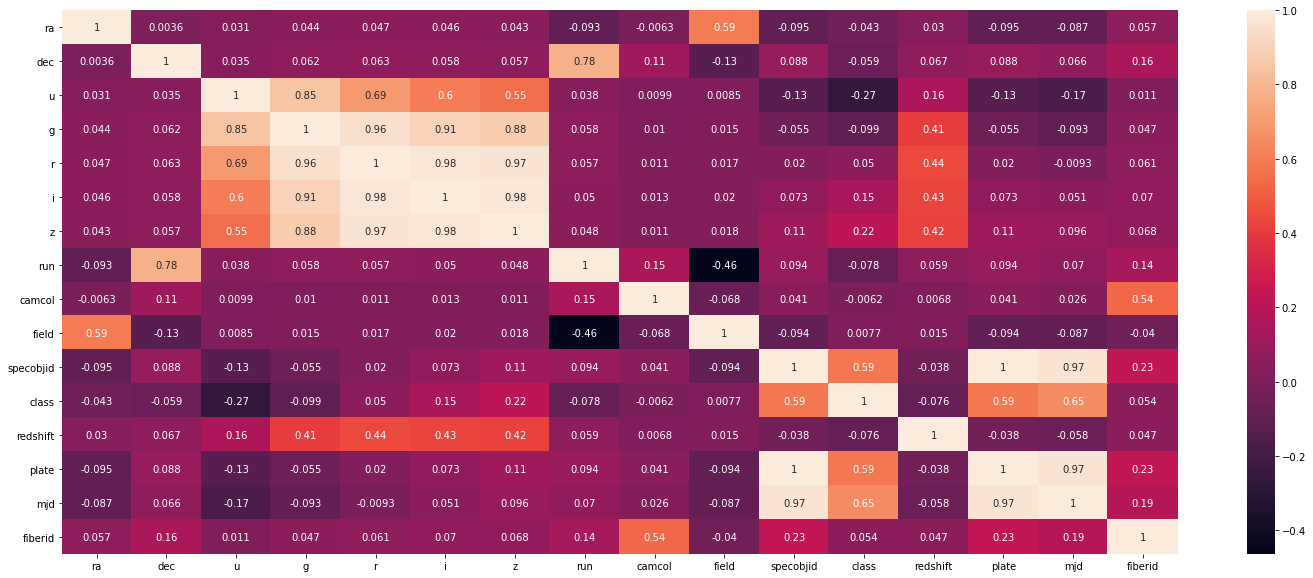

In [9]:
plt.figure(figsize = (25,10))
sb.heatmap(data.corr(),annot = True)

* u,g,r,i,z have a very strong corelation with each other


**Ra and Class**

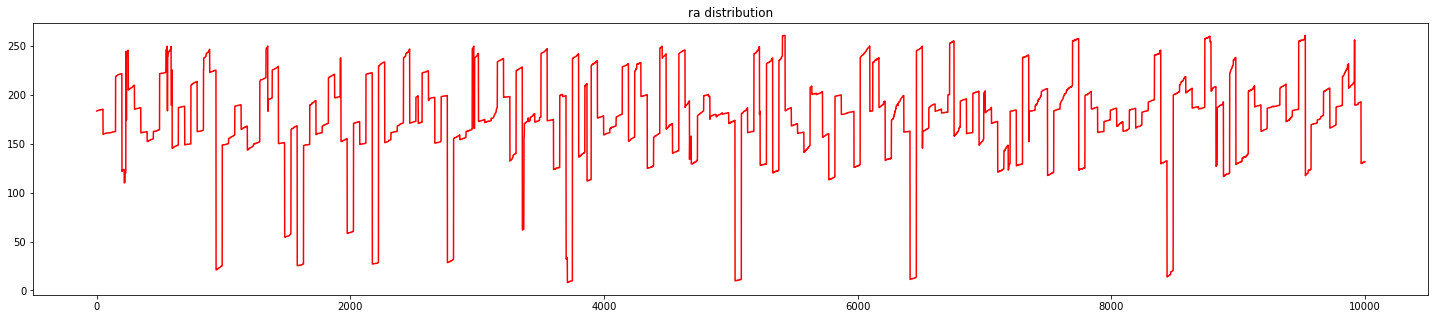

In [10]:
plt.figure(figsize = (25,5))
plt.plot(data['ra'],color = 'red');
plt.title('ra distribution');


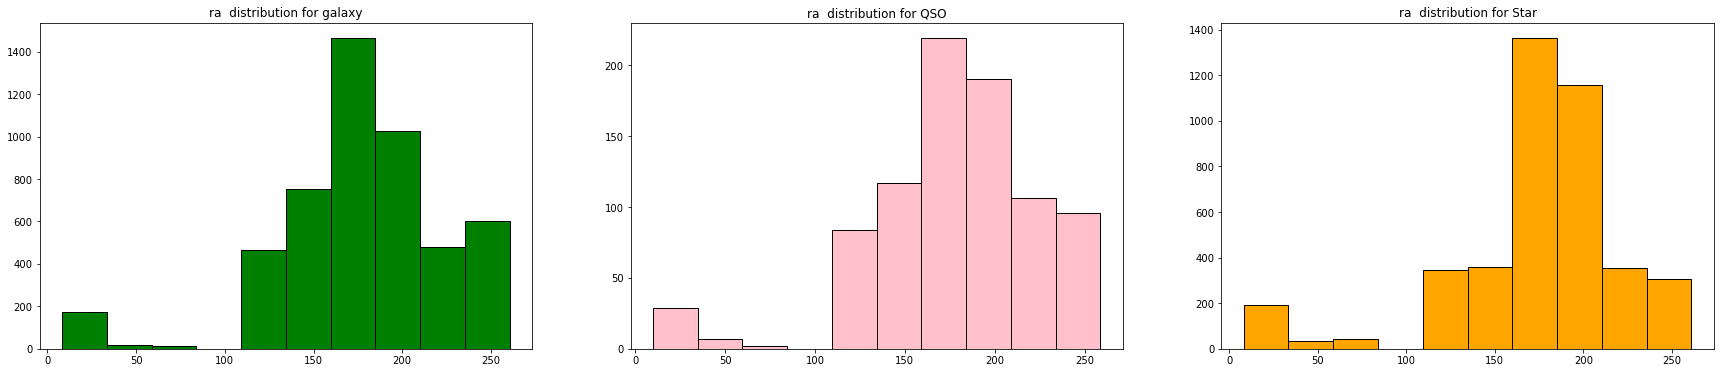

In [11]:
fig,ax = plt.subplots(1,3,figsize = (30,6))
ax[0].hist([data[data['class']==0]['ra']],color = 'green',edgecolor = 'black');
ax[0].set_title('ra  distribution for galaxy');
ax[1].hist([data[data['class']==1]['ra']],color = 'pink',edgecolor = 'black');
ax[1].set_title('ra  distribution for QSO');
ax[2].hist([data[data['class']==2]['ra']],color = 'orange',edgecolor = 'black');
ax[2].set_title('ra  distribution for Star');


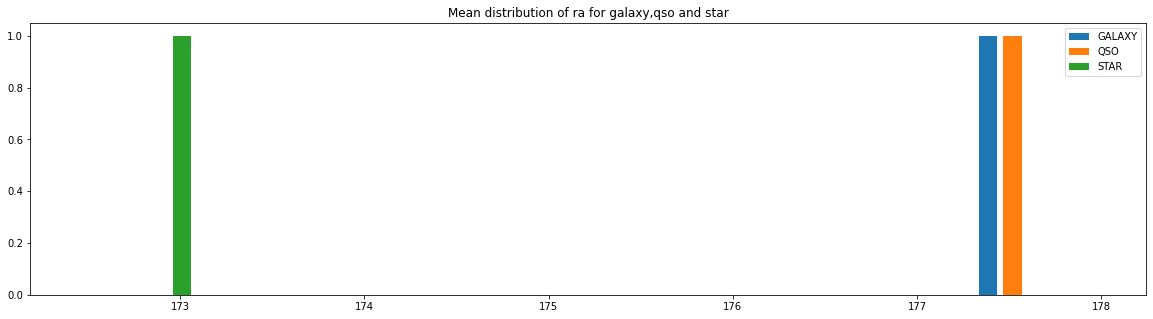

In [12]:
plt.figure(figsize = (20,5))
plt.hist(data[data['class']==0]['ra'].mean(),label = 'GALAXY');
plt.hist(data[data['class']==1]['ra'].mean(),label = 'QSO');
plt.hist(data[data['class']==2]['ra'].mean(),label = 'STAR');
plt.title('Mean distribution of ra for galaxy,qso and star');
plt.legend();

DEC and class

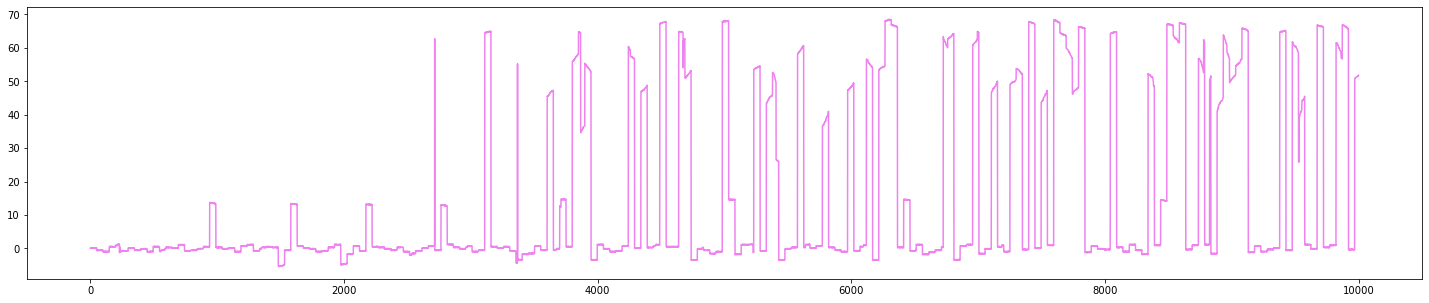

In [13]:
plt.figure(figsize = (25,5))
plt.plot(data['dec'],color = 'violet')

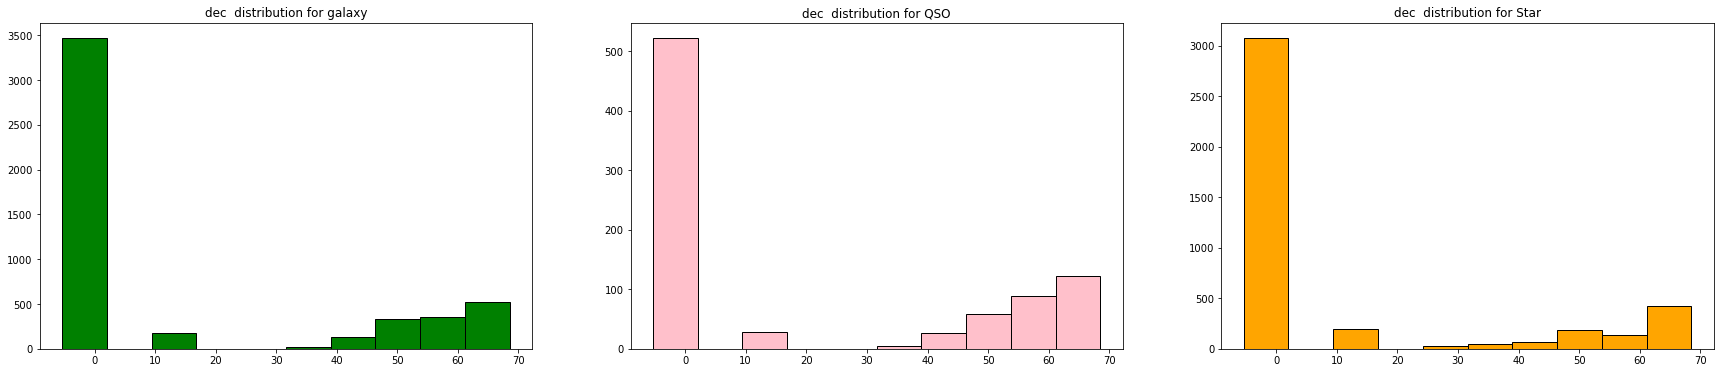

In [14]:
fig,ax = plt.subplots(1,3,figsize = (30,6))
ax[0].hist([data[data['class']==0]['dec']],color = 'green',edgecolor = 'black');
ax[0].set_title('dec  distribution for galaxy');
ax[1].hist([data[data['class']==1]['dec']],color = 'pink',edgecolor = 'black');
ax[1].set_title('dec  distribution for QSO');
ax[2].hist([data[data['class']==2]['dec']],color = 'orange',edgecolor = 'black');
ax[2].set_title('dec  distribution for Star');

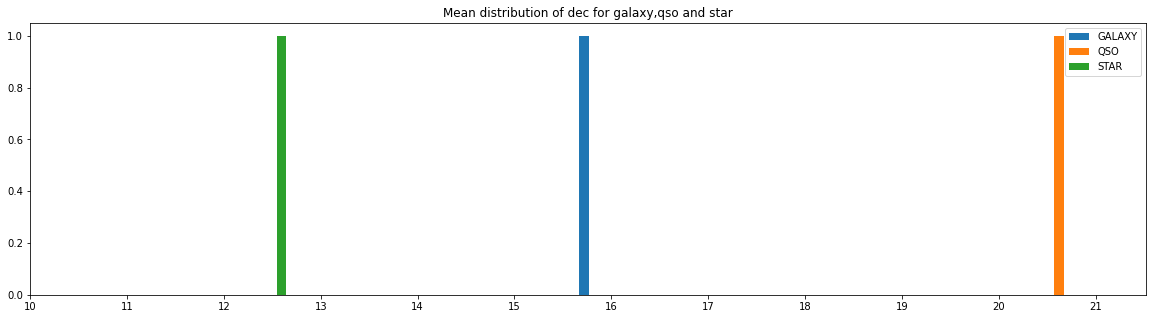

In [15]:
plt.figure(figsize = (20,5))
plt.hist(data[data['class']==0]['dec'].mean(),label = 'GALAXY');
plt.hist(data[data['class']==1]['dec'].mean(),label = 'QSO');
plt.hist(data[data['class']==2]['dec'].mean(),label = 'STAR');
plt.xticks([10,11,12,13,14,15,16,17,18,19,20,21])
plt.title('Mean distribution of dec for galaxy,qso and star');
plt.legend();

**U,G,R,I,Z and Class**

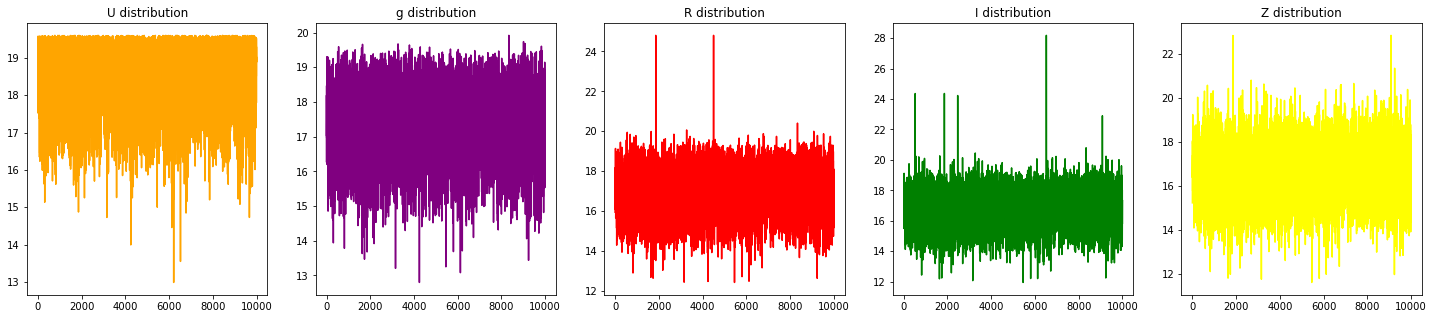

In [16]:
fig,ax = plt.subplots(1,5,figsize = (25,5))
ax[0].plot(data['u'],color = 'orange');
ax[0].set_title('U distribution');
ax[1].plot(data['g'],color = 'purple');
ax[1].set_title('g distribution');
ax[2].plot(data['r'],color = 'red');
ax[2].set_title('R distribution');
ax[3].plot(data['i'],color = 'green');
ax[3].set_title('I distribution');
ax[4].plot(data['z'],color = 'yellow');
ax[4].set_title('Z distribution');

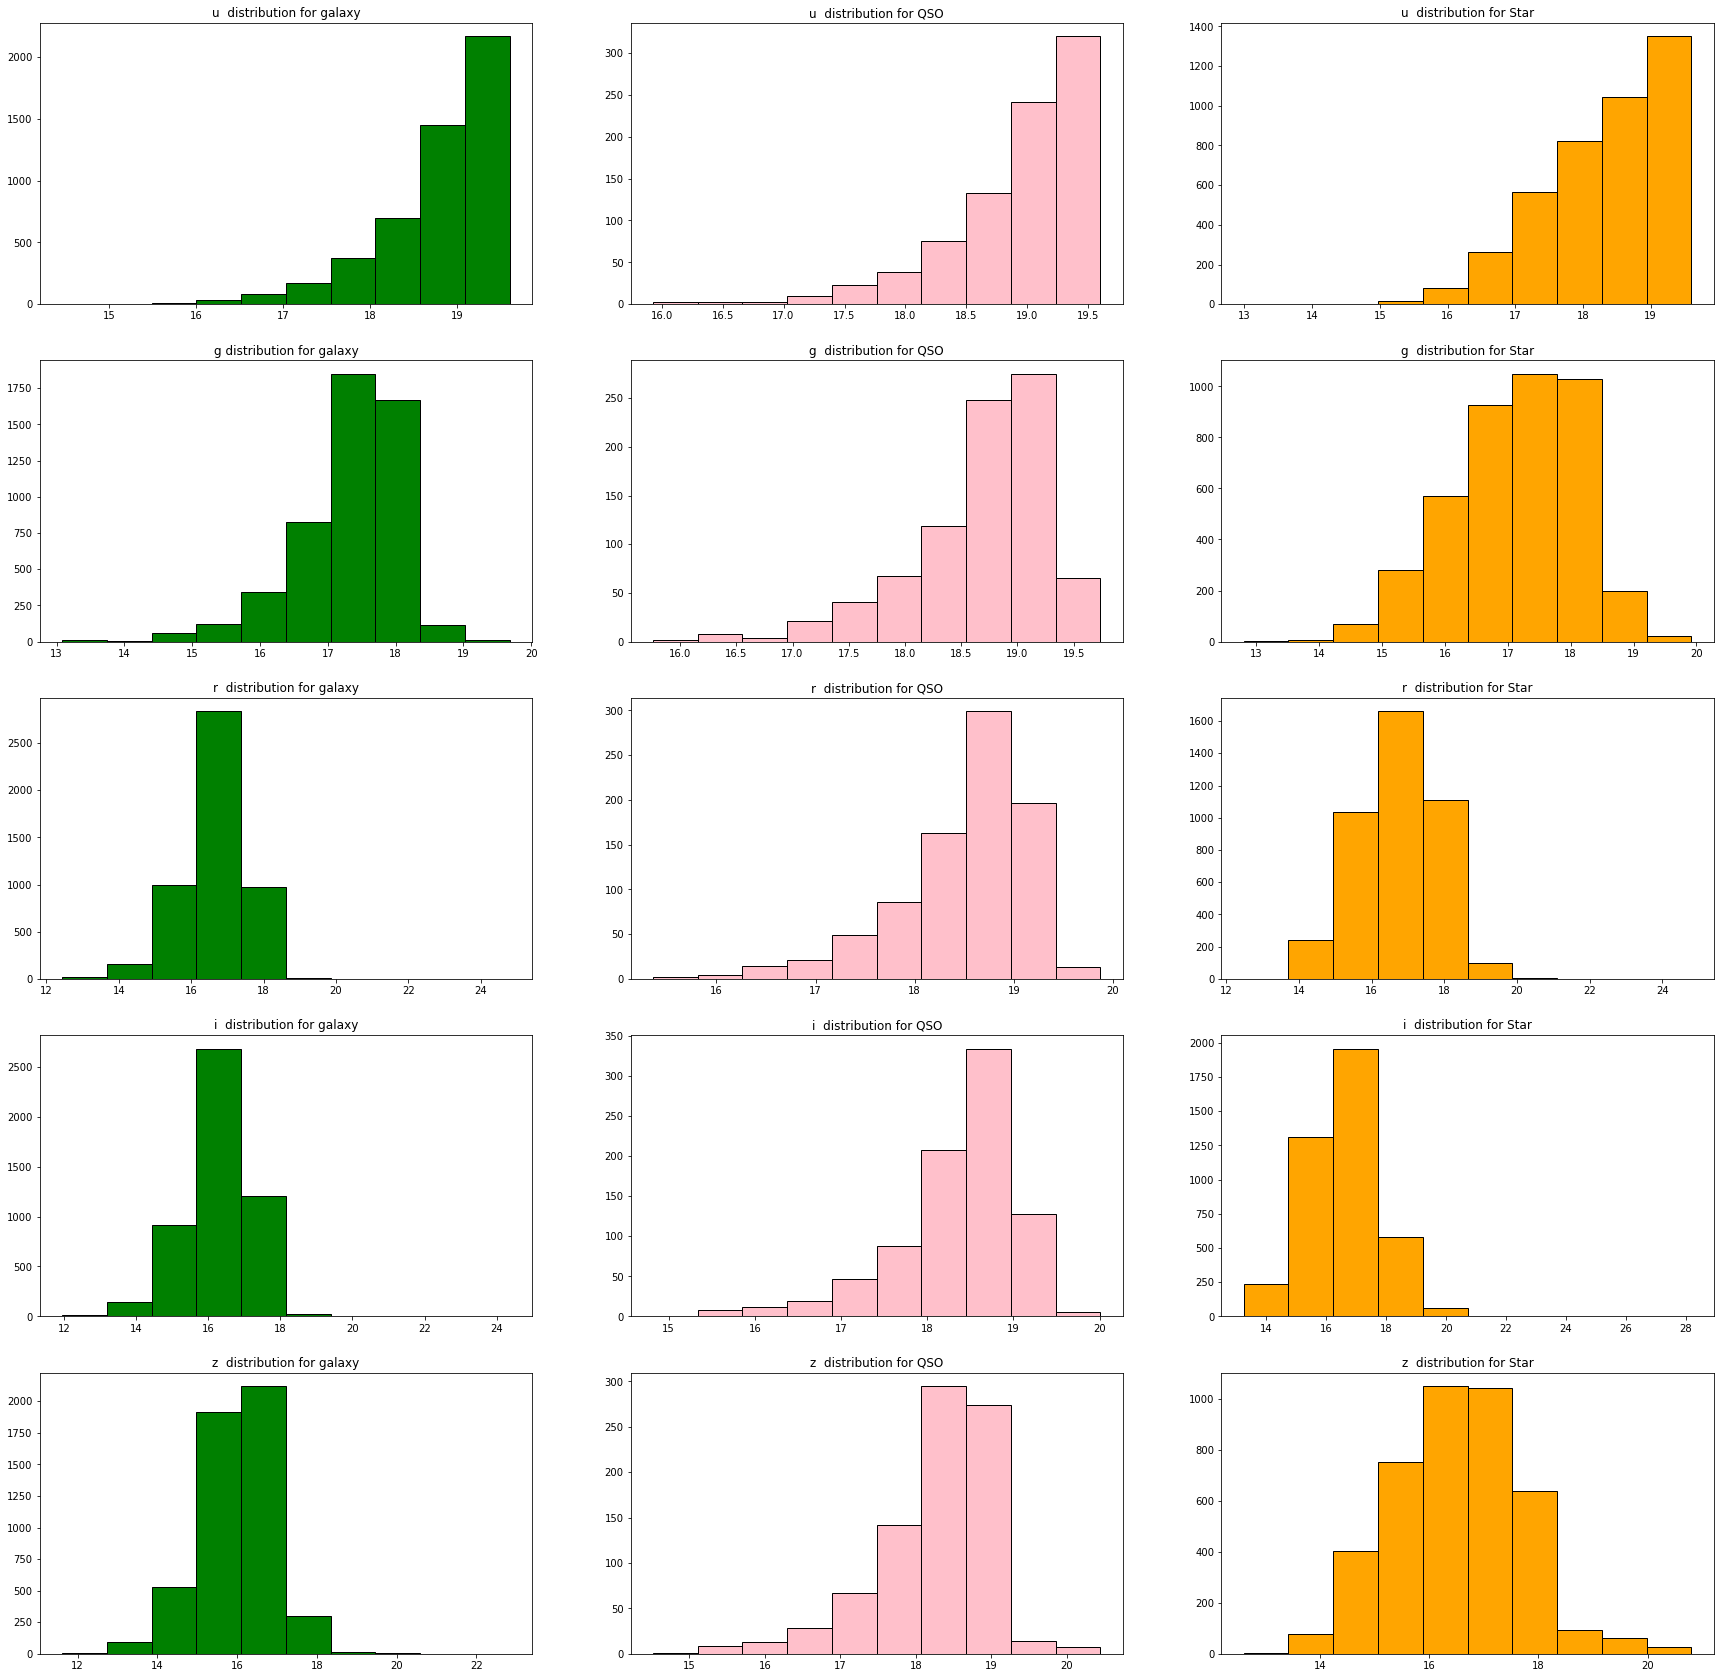

In [17]:
fig,ax = plt.subplots(5,3,figsize = (30,30))
ax[0][0].hist([data[data['class']==0]['u']],color = 'green',edgecolor = 'black');
ax[0][0].set_title('u  distribution for galaxy');
ax[0][1].hist([data[data['class']==1]['u']],color = 'pink',edgecolor = 'black');
ax[0][1].set_title('u  distribution for QSO');
ax[0][2].hist([data[data['class']==2]['u']],color = 'orange',edgecolor = 'black');
ax[0][2].set_title('u  distribution for Star');
ax[1][0].hist([data[data['class']==0]['g']],color = 'green',edgecolor = 'black');
ax[1][0].set_title('g distribution for galaxy');
ax[1][1].hist([data[data['class']==1]['g']],color = 'pink',edgecolor = 'black');
ax[1][1].set_title('g  distribution for QSO');
ax[1][2].hist([data[data['class']==2]['g']],color = 'orange',edgecolor = 'black');
ax[1][2].set_title('g  distribution for Star');
ax[2][0].hist([data[data['class']==0]['r']],color = 'green',edgecolor = 'black');
ax[2][0].set_title('r  distribution for galaxy');
ax[2][1].hist([data[data['class']==1]['r']],color = 'pink',edgecolor = 'black');
ax[2][1].set_title('r  distribution for QSO');
ax[2][2].hist([data[data['class']==2]['r']],color = 'orange',edgecolor = 'black');
ax[2][2].set_title('r  distribution for Star');
ax[3][0].hist([data[data['class']==0]['i']],color = 'green',edgecolor = 'black');
ax[3][0].set_title('i  distribution for galaxy');
ax[3][1].hist([data[data['class']==1]['i']],color = 'pink',edgecolor = 'black');
ax[3][1].set_title('i  distribution for QSO');
ax[3][2].hist([data[data['class']==2]['i']],color = 'orange',edgecolor = 'black');
ax[3][2].set_title('i  distribution for Star');
ax[4][0].hist([data[data['class']==0]['z']],color = 'green',edgecolor = 'black');
ax[4][0].set_title('z  distribution for galaxy');
ax[4][1].hist([data[data['class']==1]['z']],color = 'pink',edgecolor = 'black');
ax[4][1].set_title('z  distribution for QSO');
ax[4][2].hist([data[data['class']==2]['z']],color = 'orange',edgecolor = 'black');
ax[4][2].set_title('z  distribution for Star');

**Run and CLass**

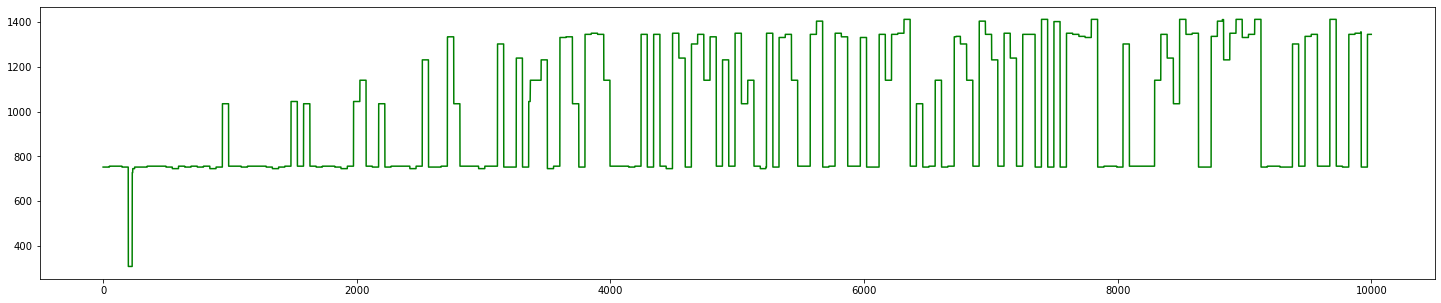

In [18]:
plt.figure(figsize = (25,5))
plt.plot(data['run'],color = 'green');

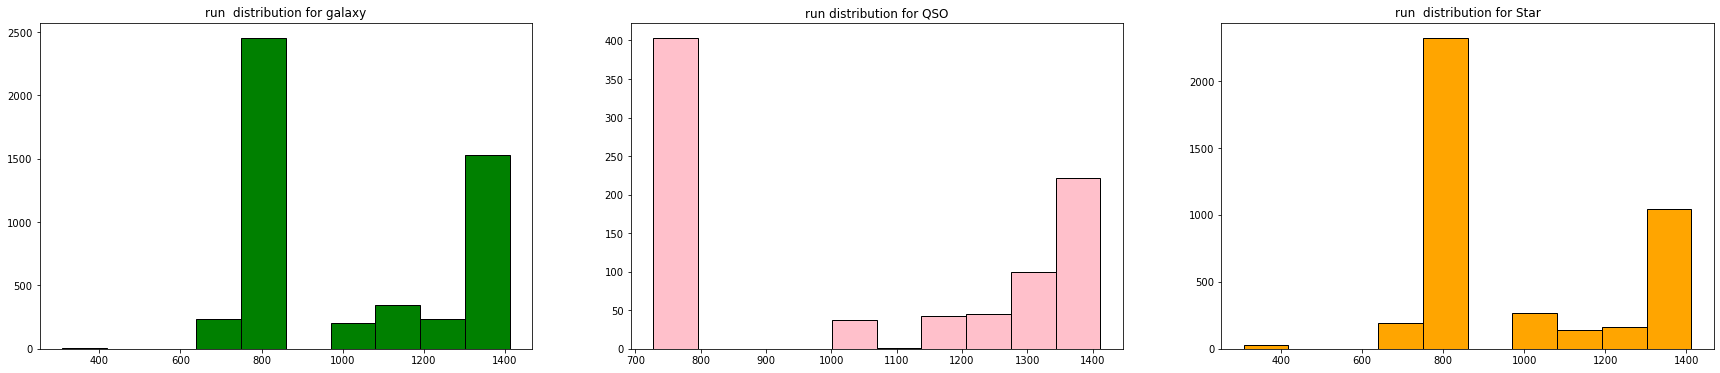

In [19]:
fig,ax = plt.subplots(1,3,figsize = (30,6))
ax[0].hist([data[data['class']==0]['run']],color = 'green',edgecolor = 'black');
ax[0].set_title('run  distribution for galaxy');
ax[1].hist([data[data['class']==1]['run']],color = 'pink',edgecolor = 'black');
ax[1].set_title('run distribution for QSO');
ax[2].hist([data[data['class']==2]['run']],color = 'orange',edgecolor = 'black');
ax[2].set_title('run  distribution for Star');

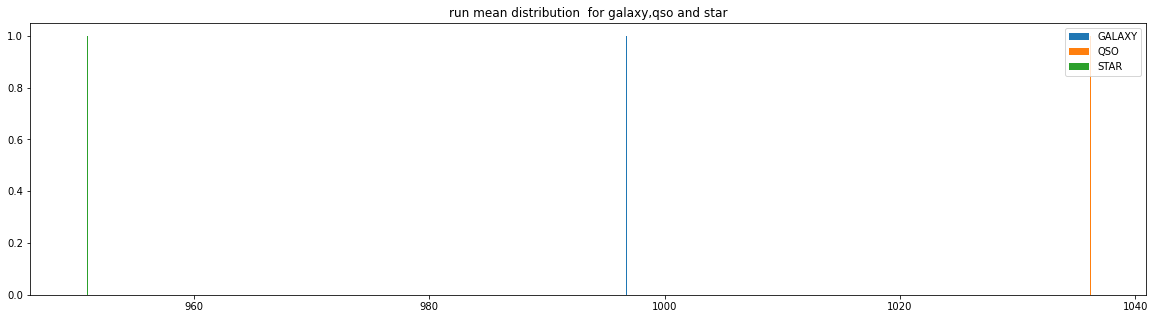

In [20]:
plt.figure(figsize = (20,5))
plt.hist(data[data['class']==0]['run'].mean(),label = 'GALAXY');
plt.hist(data[data['class']==1]['run'].mean(),label = 'QSO');
plt.hist(data[data['class']==2]['run'].mean(),label = 'STAR');
plt.title('run mean distribution  for galaxy,qso and star');
plt.legend();

**camcol and class**

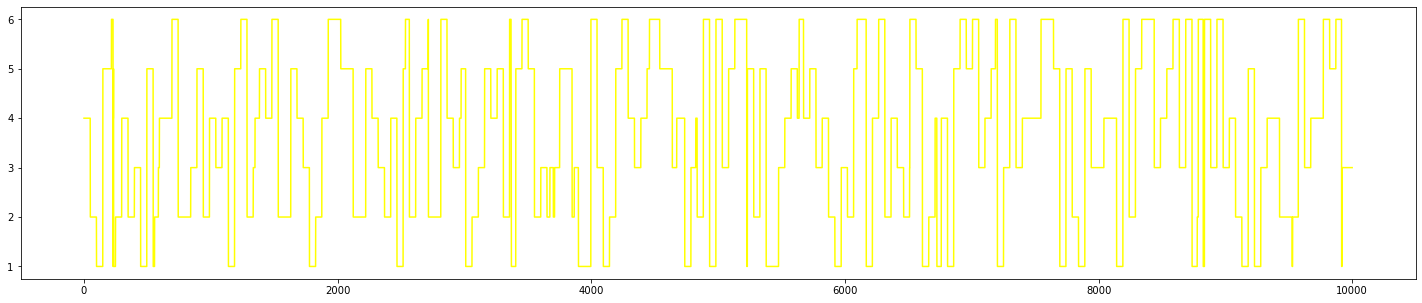

In [21]:
plt.figure(figsize = (25,5))
plt.plot(data['camcol'],color = 'yellow')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='camcol'>

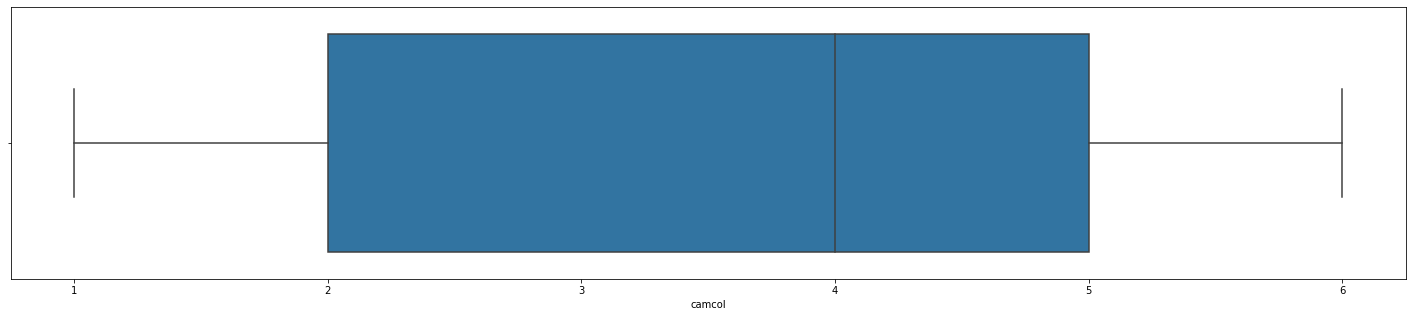

In [22]:
plt.figure(figsize = (25,5))
sb.boxplot(data['camcol'])

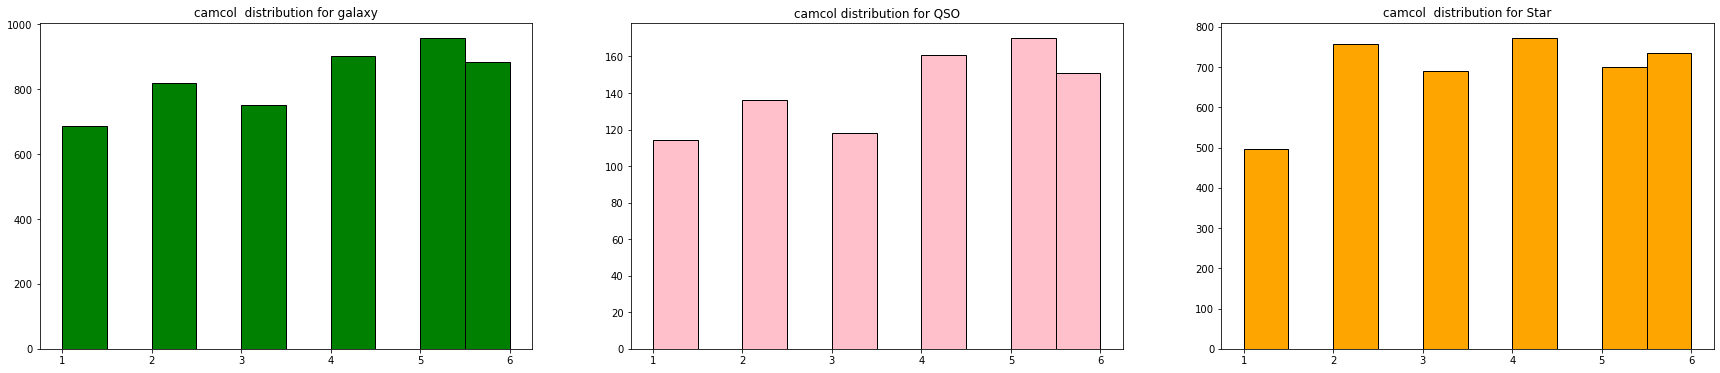

In [23]:
fig,ax = plt.subplots(1,3,figsize = (30,6))
ax[0].hist([data[data['class']==0]['camcol']],color = 'green',edgecolor = 'black');
ax[0].set_title('camcol  distribution for galaxy');
ax[1].hist([data[data['class']==1]['camcol']],color = 'pink',edgecolor = 'black');
ax[1].set_title('camcol distribution for QSO');
ax[2].hist([data[data['class']==2]['camcol']],color = 'orange',edgecolor = 'black');
ax[2].set_title('camcol  distribution for Star');

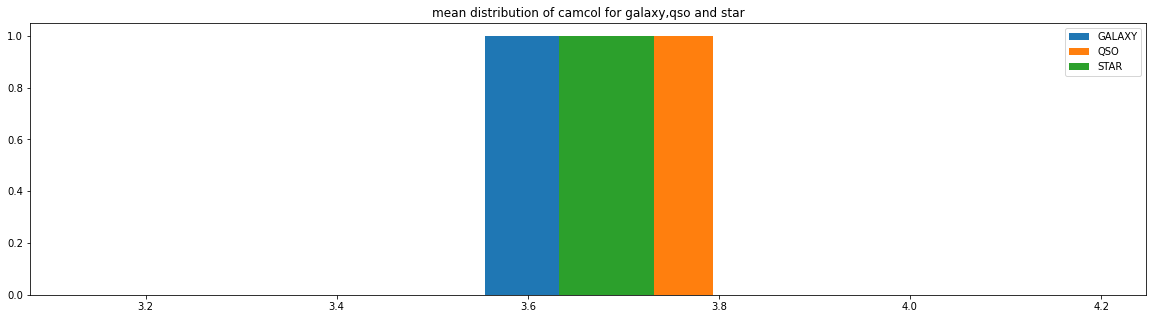

In [24]:
plt.figure(figsize = (20,5))
plt.hist(data[data['class']==0]['camcol'].mean(),label = 'GALAXY');
plt.hist(data[data['class']==1]['camcol'].mean(),label = 'QSO');
plt.hist(data[data['class']==2]['camcol'].mean(),label = 'STAR');
plt.title('mean distribution of camcol for galaxy,qso and star');
plt.legend();

**feild and class**

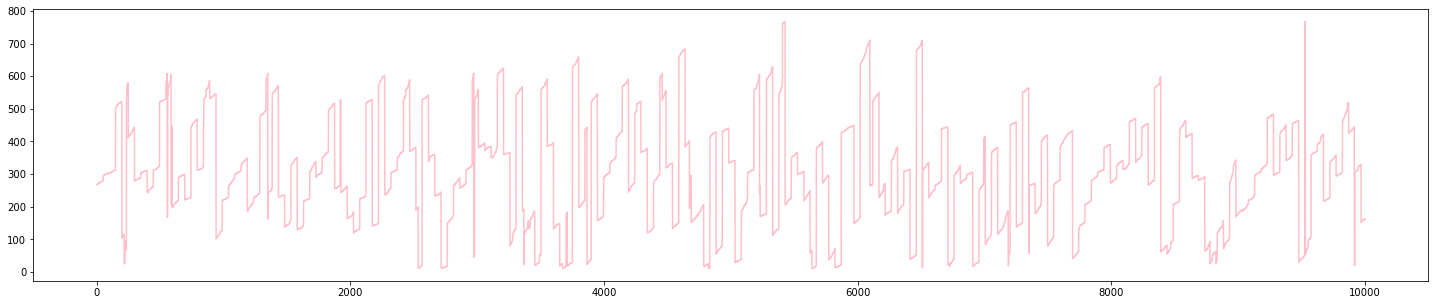

In [25]:
plt.figure(figsize = (25,5))
plt.plot(data['field'],color = 'pink')

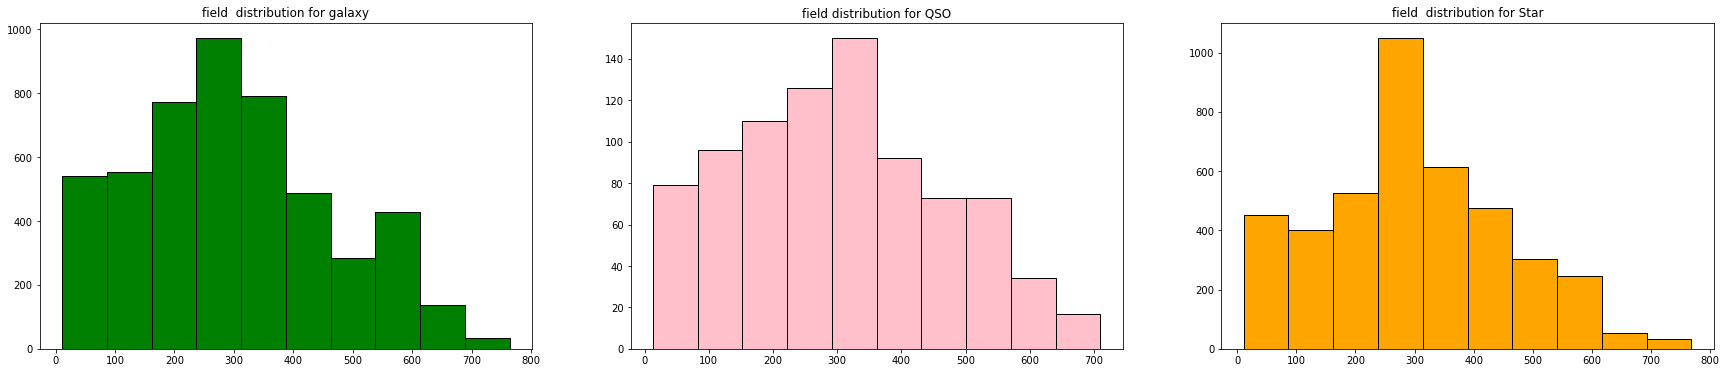

In [26]:
fig,ax = plt.subplots(1,3,figsize = (30,6))
ax[0].hist([data[data['class']==0]['field']],color = 'green',edgecolor = 'black');
ax[0].set_title('field  distribution for galaxy');
ax[1].hist([data[data['class']==1]['field']],color = 'pink',edgecolor = 'black');
ax[1].set_title('field distribution for QSO');
ax[2].hist([data[data['class']==2]['field']],color = 'orange',edgecolor = 'black');
ax[2].set_title('field  distribution for Star');

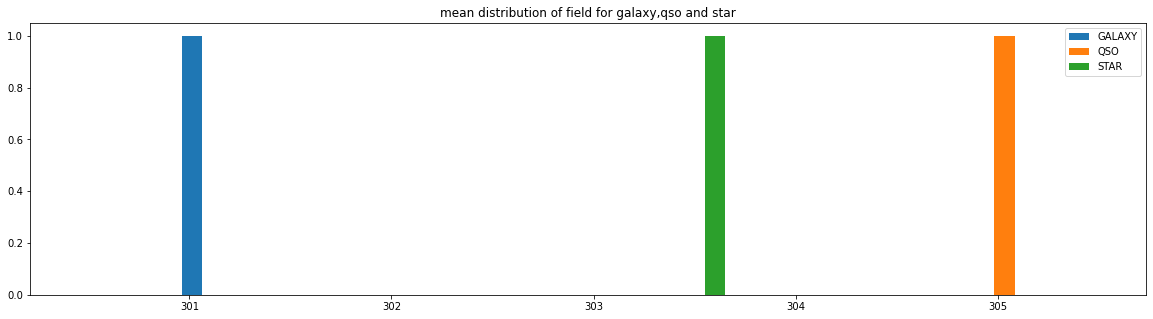

In [27]:
plt.figure(figsize = (20,5))
plt.hist(data[data['class']==0]['field'].mean(),label = 'GALAXY');
plt.hist(data[data['class']==1]['field'].mean(),label = 'QSO');
plt.hist(data[data['class']==2]['field'].mean(),label = 'STAR');
plt.title('mean distribution of field for galaxy,qso and star');
plt.legend();

specobjid and class

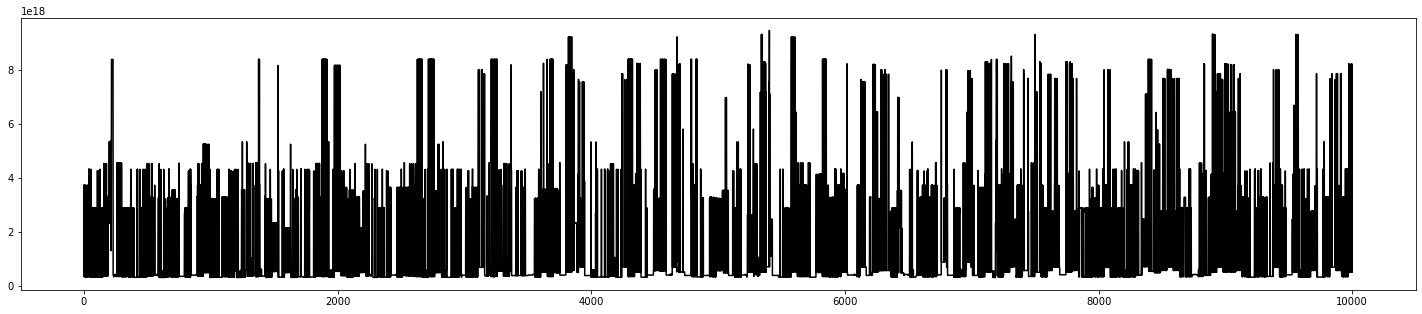

In [28]:
plt.figure(figsize = (25,5))
plt.plot(data['specobjid'],color = 'black')


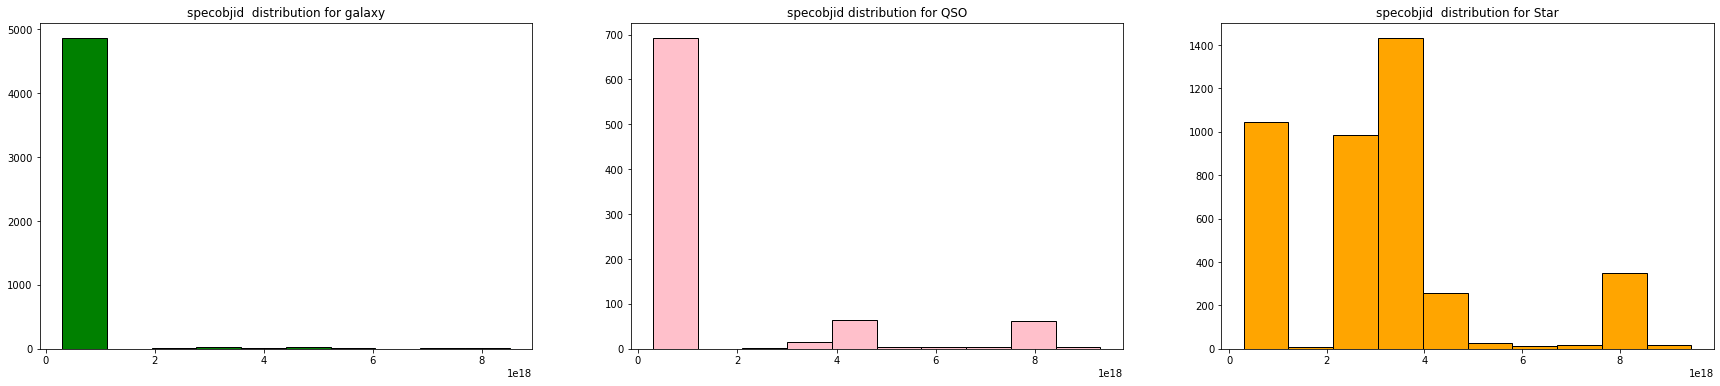

In [29]:
fig,ax = plt.subplots(1,3,figsize = (30,6))
ax[0].hist([data[data['class']==0]['specobjid']],color = 'green',edgecolor = 'black');
ax[0].set_title('specobjid  distribution for galaxy');
ax[1].hist([data[data['class']==1]['specobjid']],color = 'pink',edgecolor = 'black');
ax[1].set_title('specobjid distribution for QSO');
ax[2].hist([data[data['class']==2]['specobjid']],color = 'orange',edgecolor = 'black');
ax[2].set_title('specobjid  distribution for Star');

**RedShift and Class**

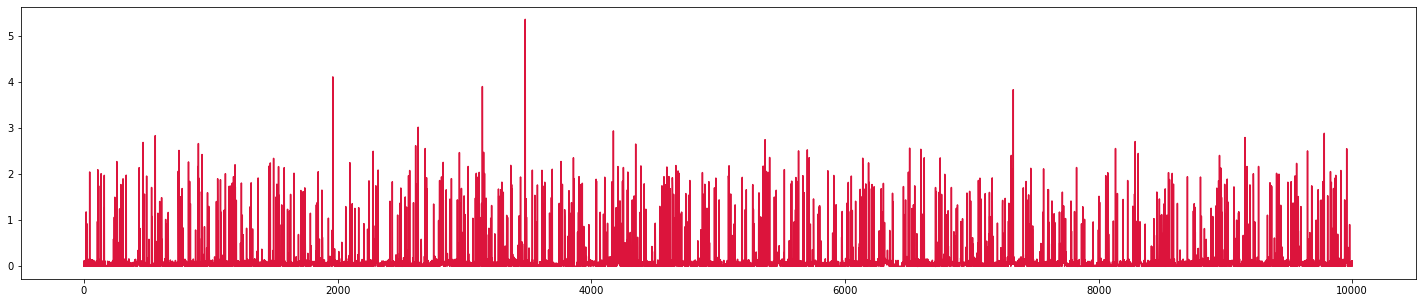

In [30]:
plt.figure(figsize = (25,5))
plt.plot(data['redshift'],color = 'crimson')

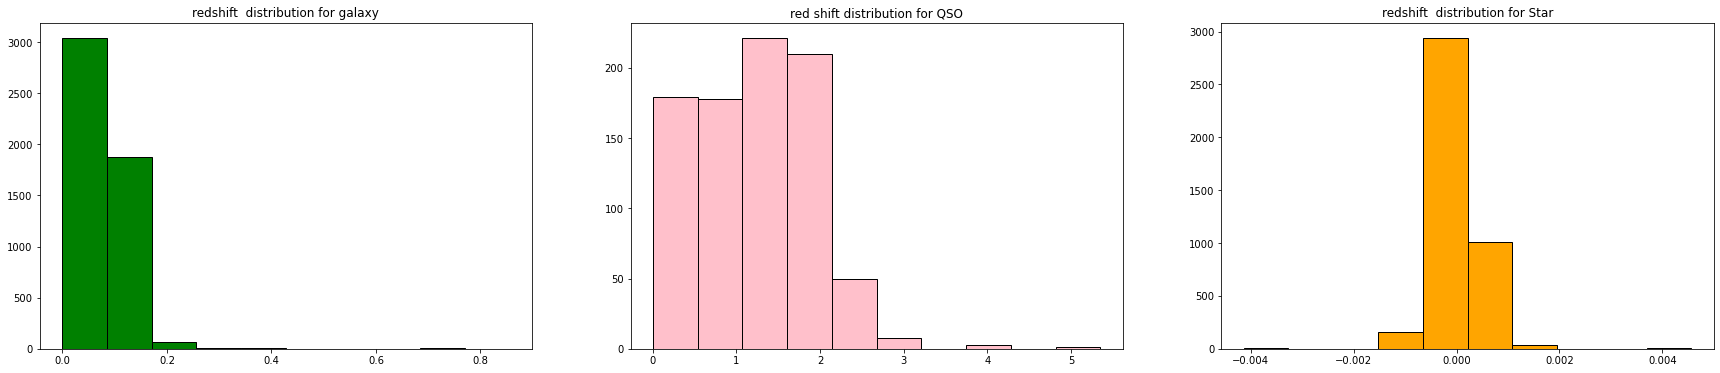

In [31]:
fig,ax = plt.subplots(1,3,figsize = (30,6))
ax[0].hist([data[data['class']==0]['redshift']],color = 'green',edgecolor = 'black');
ax[0].set_title('redshift  distribution for galaxy');
ax[1].hist([data[data['class']==1]['redshift']],color = 'pink',edgecolor = 'black');
ax[1].set_title('red shift distribution for QSO');
ax[2].hist([data[data['class']==2]['redshift']],color = 'orange',edgecolor = 'black');
ax[2].set_title('redshift  distribution for Star');

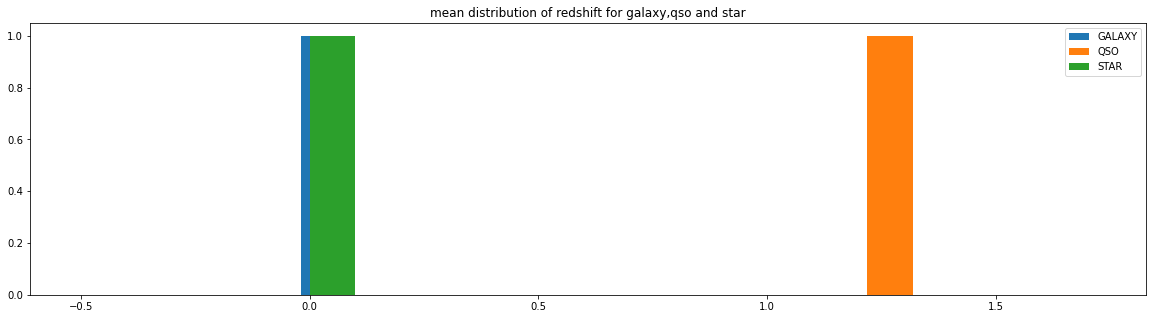

In [32]:
plt.figure(figsize = (20,5))
plt.hist(data[data['class']==0]['redshift'].mean(),label = 'GALAXY');
plt.hist(data[data['class']==1]['redshift'].mean(),label = 'QSO');
plt.hist(data[data['class']==2]['redshift'].mean(),label = 'STAR');
plt.title('mean distribution of redshift for galaxy,qso and star');
plt.legend();

**plate and class**

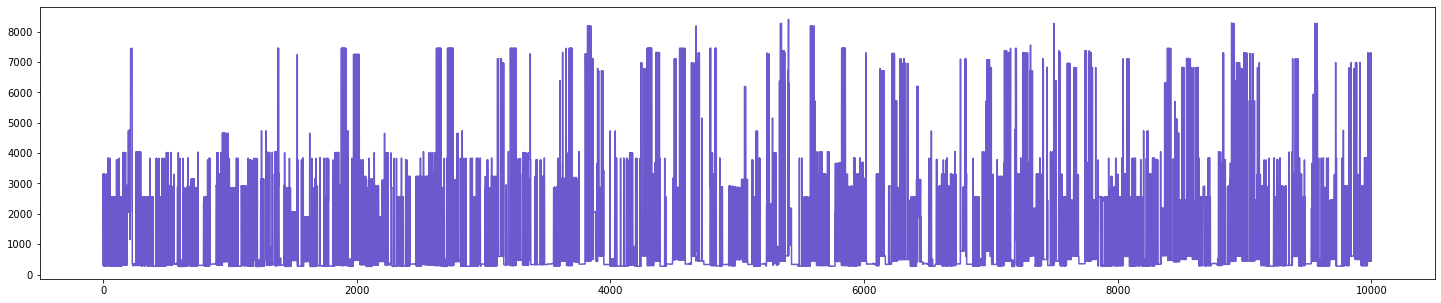

In [33]:
plt.figure(figsize = (25,5))
plt.plot(data['plate'],color = 'slateblue');

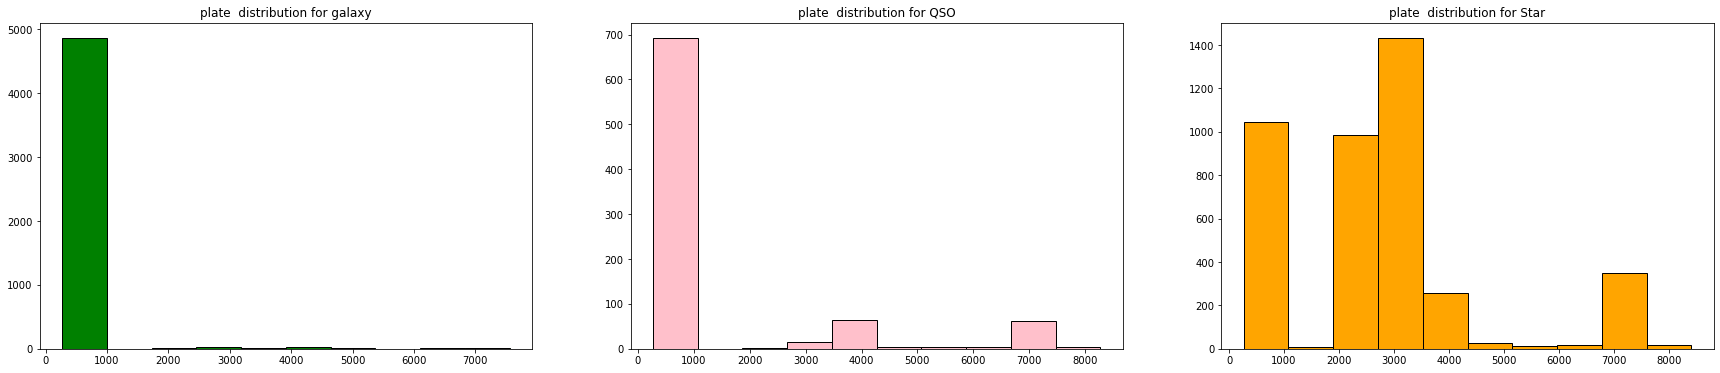

In [34]:
fig,ax = plt.subplots(1,3,figsize = (30,6))
ax[0].hist([data[data['class']==0]['plate']],color = 'green',edgecolor = 'black');
ax[0].set_title('plate  distribution for galaxy');
ax[1].hist([data[data['class']==1]['plate']],color = 'pink',edgecolor = 'black');
ax[1].set_title('plate  distribution for QSO');
ax[2].hist([data[data['class']==2]['plate']],color = 'orange',edgecolor = 'black');
ax[2].set_title('plate  distribution for Star');

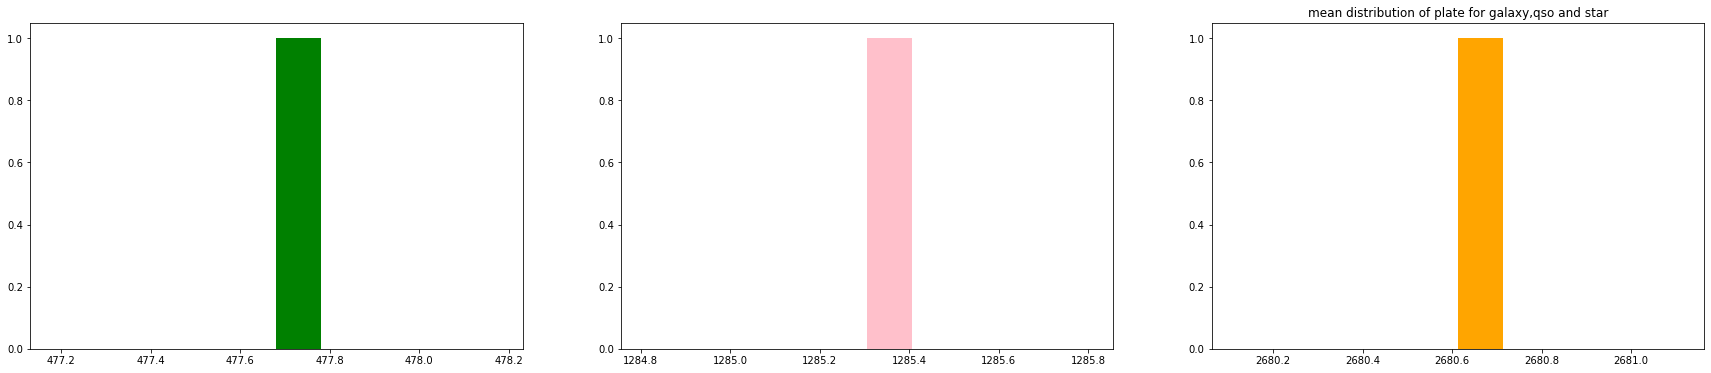

In [35]:
fig,ax = plt.subplots(1,3,figsize = (30,6))
ax[0].hist(data[data['class']==0]['plate'].mean(),label = 'GALAXY',color = 'green');
ax[1].hist(data[data['class']==1]['plate'].mean(),label = 'QSO',color = 'pink');
ax[2].hist(data[data['class']==2]['plate'].mean(),label = 'STAR',color = 'orange');
plt.title('mean distribution of plate for galaxy,qso and star');


**mjd and class**

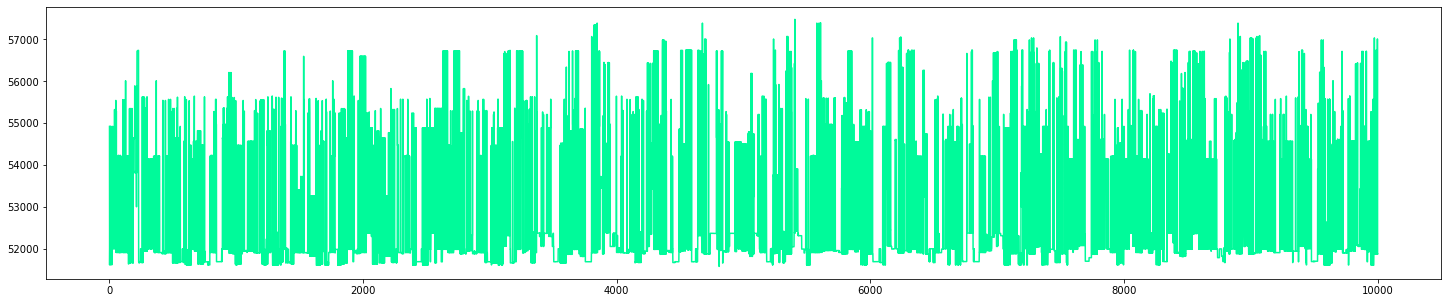

In [36]:
plt.figure(figsize = (25,5))
plt.plot(data['mjd'],color = 'mediumspringgreen');

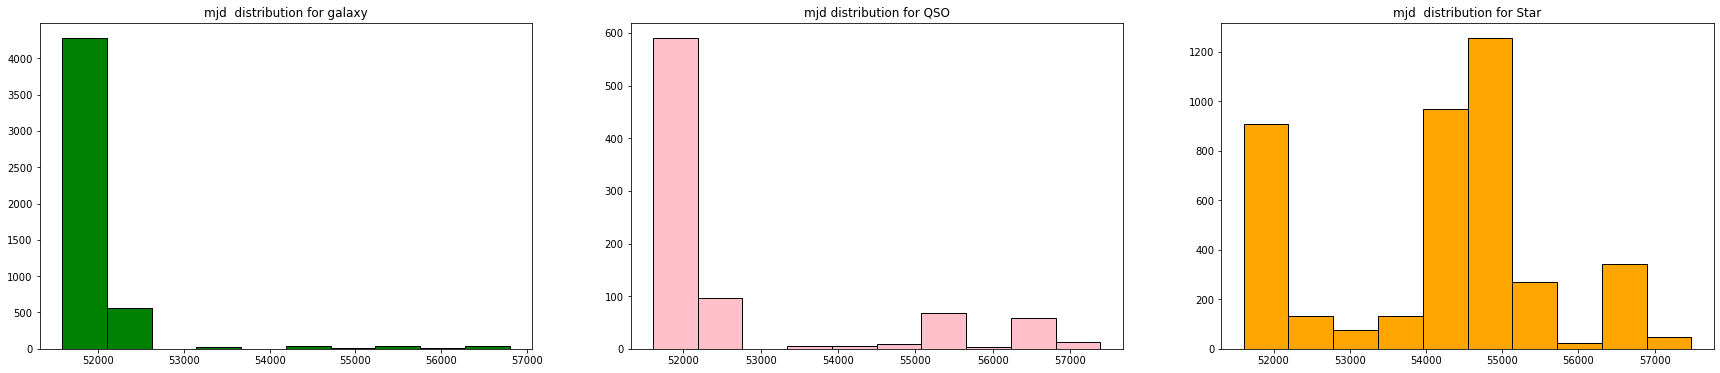

In [37]:
fig,ax = plt.subplots(1,3,figsize = (30,6))
ax[0].hist([data[data['class']==0]['mjd']],color = 'green',edgecolor = 'black');
ax[0].set_title('mjd  distribution for galaxy');
ax[1].hist([data[data['class']==1]['mjd']],color = 'pink',edgecolor = 'black');
ax[1].set_title('mjd distribution for QSO');
ax[2].hist([data[data['class']==2]['mjd']],color = 'orange',edgecolor = 'black');
ax[2].set_title('mjd  distribution for Star');

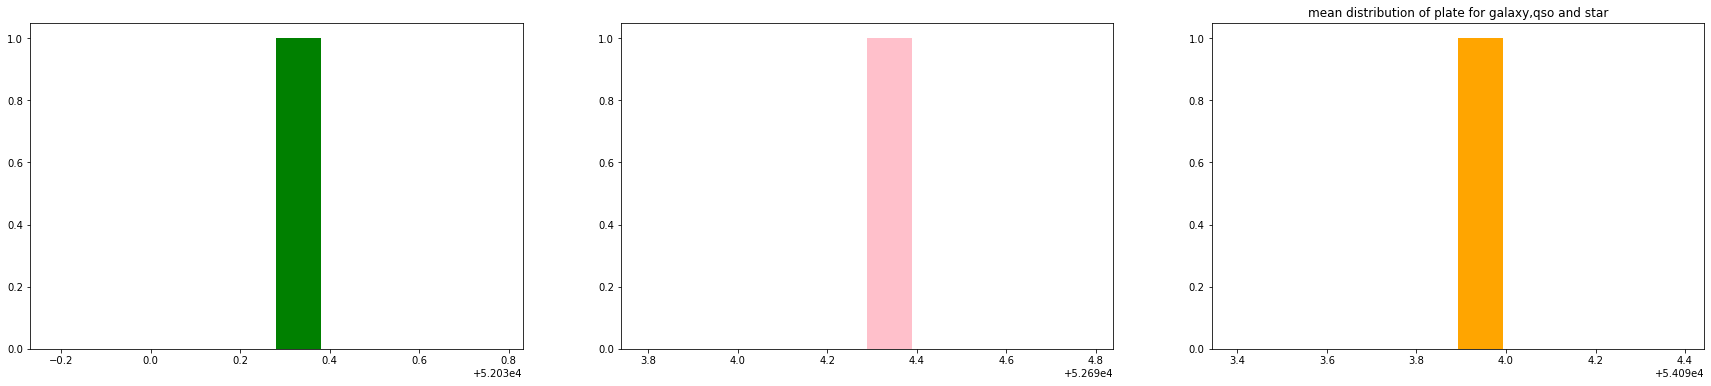

In [38]:
fig,ax = plt.subplots(1,3,figsize = (30,6))
ax[0].hist(data[data['class']==0]['mjd'].mean(),label = 'GALAXY',color = 'green');
ax[1].hist(data[data['class']==1]['mjd'].mean(),label = 'QSO',color = 'pink');
ax[2].hist(data[data['class']==2]['mjd'].mean(),label = 'STAR',color = 'orange');
plt.title('mean distribution of plate for galaxy,qso and star');

fiberid and class

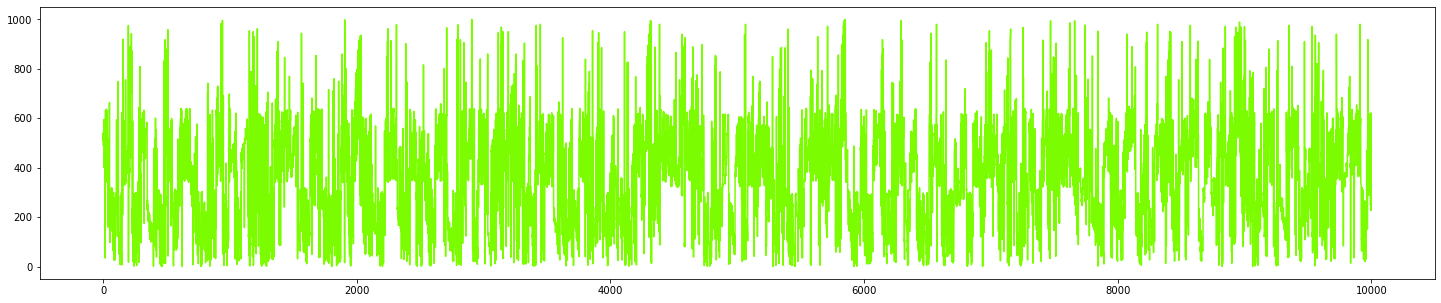

In [39]:
plt.figure(figsize = (25,5))
plt.plot(data['fiberid'],color = 'lawngreen');

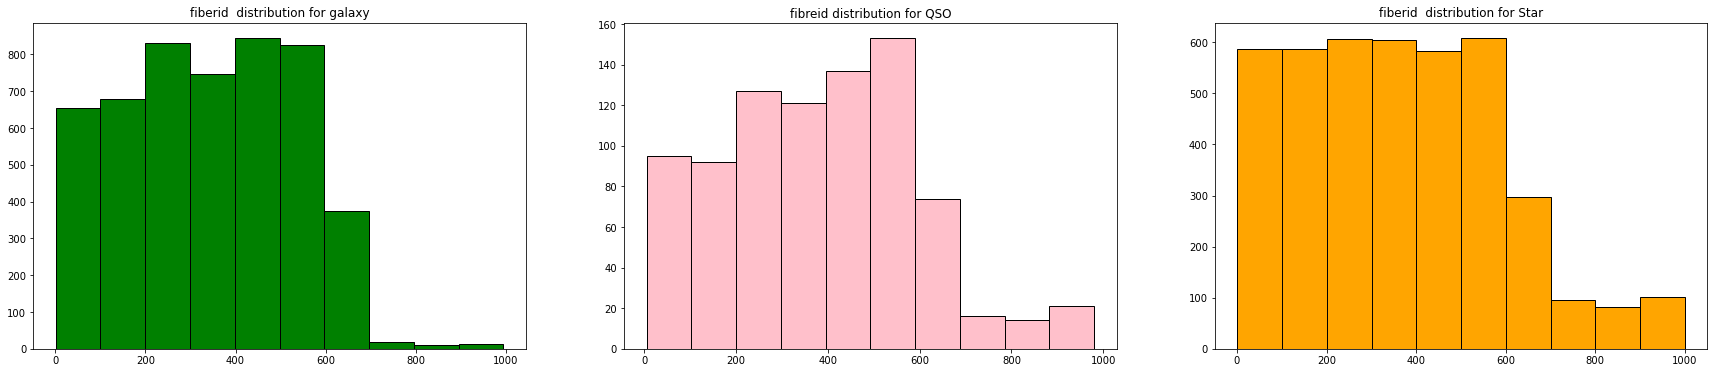

In [40]:
fig,ax = plt.subplots(1,3,figsize = (30,6))
ax[0].hist([data[data['class']==0]['fiberid']],color = 'green',edgecolor = 'black');
ax[0].set_title('fiberid  distribution for galaxy');
ax[1].hist([data[data['class']==1]['fiberid']],color = 'pink',edgecolor = 'black');
ax[1].set_title('fibreid distribution for QSO');
ax[2].hist([data[data['class']==2]['fiberid']],color = 'orange',edgecolor = 'black');
ax[2].set_title('fiberid  distribution for Star');

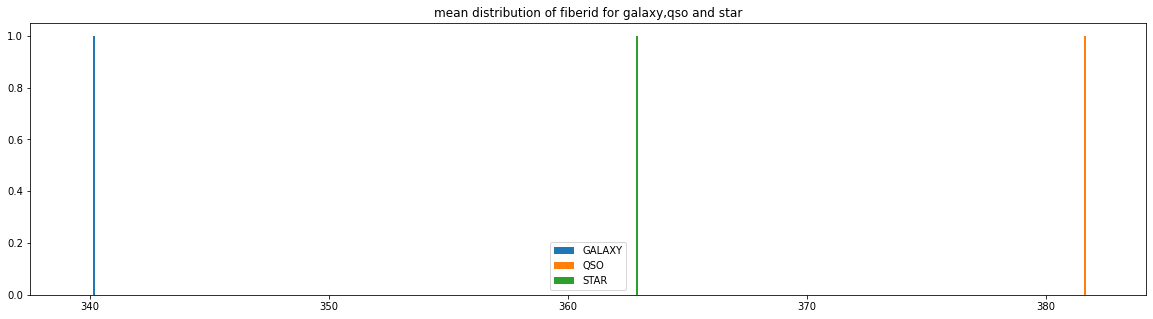

In [41]:
plt.figure(figsize = (20,5))
plt.hist(data[data['class']==0]['fiberid'].mean(),label = 'GALAXY');
plt.hist(data[data['class']==1]['fiberid'].mean(),label = 'QSO');
plt.hist(data[data['class']==2]['fiberid'].mean(),label = 'STAR');
plt.title('mean distribution of fiberid for galaxy,qso and star');
plt.legend();

# Model Selection

In [42]:
y = data['class']
data.drop('class',1,inplace=True)
x = data

In [43]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = (0.25),random_state=42)

1. **KNeighborsClassifier**

In [44]:
model_params = {'n_neighbors':np.arange(1,10)}
grid = GridSearchCV(KNeighborsClassifier(),model_params)
grid.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [45]:
grid.best_params_

{'n_neighbors': 9}

In [46]:
KNNmodel = KNeighborsClassifier(n_neighbors = 9)
KNNmodel.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9)

In [47]:
y_train_pred = cross_val_predict(KNNmodel,x_train,y_train,cv=3)
print("Confusion Matrix:")
print(confusion_matrix(y_train,y_train_pred))
print("")
precision_knn = precision_score(y_train_pred,y_train,average = None)
print("Precison_Score:",precision_knn.mean())
recall_knn = recall_score(y_train_pred,y_train,average = None)
print("Recall_score:",recall_knn.mean())

print("Cross Val Score in Sample",cross_val_score(KNNmodel,x_train,y_train,cv=3,scoring='accuracy').mean())
print("Cross Val Score out Sample",cross_val_score(KNNmodel,x_test,y_test,cv=3,scoring='accuracy').mean())


Confusion Matrix:
[[3587   12  153]
 [ 489   21   98]
 [ 682   18 2440]]

Precison_Score: 0.5892109971787535
Recall_score: 0.690793006104733
Cross Val Score in Sample 0.8064
Cross Val Score out Sample 0.7771880934628047


2. NaiveBayes using GaussianNB

In [48]:
GausianModel = GaussianNB()
GausianModel.fit(x_train,y_train)

GaussianNB()

In [49]:
y_train_pred = cross_val_predict(GausianModel,x_train,y_train,cv=3)
print("Confusion Matrix:")
print(confusion_matrix(y_train,y_train_pred))
print("")
precision_NB = precision_score(y_train_pred,y_train,average = None)
print("Precison_Score:",precision_NB.mean())
recall_NB = recall_score(y_train_pred,y_train,average = None)
print("Recall_score:",recall_NB.mean())

print("Cross Val Score in Sample",cross_val_score(GausianModel,x_train,y_train,cv=3,scoring='accuracy').mean())
print("Cross Val Score out Sample",cross_val_score(GausianModel,x_test,y_test,cv=3,scoring='accuracy').mean())


Confusion Matrix:
[[3646    0  106]
 [ 502    0  106]
 [ 773    0 2367]]

Precison_Score: 0.5751900189679446
Recall_score: 0.5529013052737058
Cross Val Score in Sample 0.8017333333333333
Cross Val Score out Sample 0.7807972109707192


/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


3. **Decision Tree Classifier**

In [50]:
params = {'min_samples_leaf':np.arange(2,10),'max_depth':np.arange(1,15)}
grid = GridSearchCV(DecisionTreeClassifier(),params)
grid.fit(x,y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [51]:
grid.best_params_

{'max_depth': 13, 'min_samples_leaf': 6}

In [52]:
DecisionTree  = DecisionTreeClassifier(max_depth=9, min_samples_leaf=6)
DecisionTree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=6)

In [53]:
y_train_pred = cross_val_predict(DecisionTree,x_train,y_train,cv=3)
print("Confusion Matrix:")
print(confusion_matrix(y_train,y_train_pred))
print("")
precision_DecisionTree = precision_score(y_train_pred,y_train,average = None)
print("Precison_Score:",precision_DecisionTree.mean())
recall_DecisionTree = recall_score(y_train_pred,y_train,average = None)
print("Recall_score:",recall_DecisionTree.mean())

print("Cross Val Score in Sample",cross_val_score(DecisionTree,x_train,y_train,cv=3,scoring='accuracy').mean())
print("Cross Val Score out Sample",cross_val_score(DecisionTree,x_test,y_test,cv=3,scoring='accuracy').mean())


Confusion Matrix:
[[3712   33    7]
 [  49  558    1]
 [   7    0 3133]]

Precison_Score: 0.9682909592404817
Recall_score: 0.9755844937424971
Cross Val Score in Sample 0.9870666666666666
Cross Val Score out Sample 0.9864017549465829


4.RandomForestClassifier

In [54]:
Forest  = RandomForestClassifier(max_depth = 9,min_samples_leaf = 6,n_estimators = 1000)
Forest.fit(x_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_leaf=6, n_estimators=1000)

In [55]:
y_train_pred = cross_val_predict(Forest,x_train,y_train,cv=3)
print("Confusion Matrix:")
print(confusion_matrix(y_train,y_train_pred))
print("")
precision_Forest = precision_score(y_train_pred,y_train,average = None)
print("Precison_Score:",precision_Forest.mean())
recall_Forest = recall_score(y_train_pred,y_train,average = None)
print("Recall_score:",recall_Forest.mean())

print("Cross Val Score in Sample",cross_val_score(Forest,x_train,y_train,cv=3,scoring='accuracy').mean())
print("Cross Val Score out Sample",cross_val_score(Forest,x_test,y_test,cv=3,scoring='accuracy').mean())


Confusion Matrix:
[[3706   26   20]
 [  54  553    1]
 [   2    0 3138]]

Precison_Score: 0.9655474676924273
Recall_score: 0.9778538729846188
Cross Val Score in Sample 0.9859999999999999
Cross Val Score out Sample 0.9824020735392479


5. AdaBoostClassifier on DecisionTreeClassifier

In [56]:
adb = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 9,min_samples_leaf = 6))
adb.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9,
                                                         min_samples_leaf=6))

In [57]:
y_train_pred = cross_val_predict(adb,x_train,y_train,cv=3)
print("Confusion Matrix:")
print(confusion_matrix(y_train,y_train_pred))
print("")
precision_adb = precision_score(y_train_pred,y_train,average = None)
print("Precison_Score:",precision_adb.mean())
recall_adb = recall_score(y_train_pred,y_train,average = None)
print("Recall_score:",recall_adb.mean())

print("Cross Val Score in Sample",cross_val_score(adb,x_train,y_train,cv=3,scoring='accuracy').mean())
print("Cross Val Score out Sample",cross_val_score(adb,x_test,y_test,cv=3,scoring='accuracy').mean())

Confusion Matrix:
[[3710   24   18]
 [  41  566    1]
 [   3    0 3137]]

Precison_Score: 0.9729238695893646
Recall_score: 0.9805269746502864
Cross Val Score in Sample 0.9877333333333334
Cross Val Score out Sample 0.989202395586532


# Model Deployement

In [58]:
model = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 9,min_samples_leaf = 6))
model.fit(x,y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=9,
                                                         min_samples_leaf=6))

In [59]:
x

,ra,dec,u,g,r,i,z,run,camcol,field,specobjid,redshift,plate,mjd,fiberid
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,4,267,3.638140e+17,-0.000055,323,51615,541
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,4,268,3.232740e+17,0.123111,287,52023,513
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,4,269,3.722370e+18,-0.000111,3306,54922,510
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,4,269,3.722370e+18,0.000590,3306,54922,512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,3,161,5.033450e+17,0.027583,447,51877,246
9996,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,3,162,5.033400e+17,0.117772,447,51877,228
9997,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,3,162,8.222620e+18,-0.000402,7303,57013,622
9998,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,3,163,5.033400e+17,0.014019,447,51877,229


In [60]:
to_predict = [[183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,4,267,3.722360e+18,-0.000009,3306,54922,491]]
model.predict(to_predict)

array([2])

In [61]:
y[1]

2